In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math

In [3]:
df = pd.read_csv('./desktop/log_reg.csv')
df.head()

,Cust_id,Transactions,Amount,Status,Week
0,DB0001,Purchase,300,1,Week 1
1,DB0001,Purchase,300,1,Week 1
2,DB0009,Purchase,200,0,Week 1
3,DB0005,Purchase,500,0,Week 1
4,DB0009,Purchase,1860,0,Week 1


In [4]:
print('No of transactions:', str(len(df.index)))

No of transactions: 534


In [5]:
nandf = df[df.isna().any(axis=1)]
nandf.head()

,Cust_id,Transactions,Amount,Status,Week


# Analyze data

<AxesSubplot:xlabel='Status', ylabel='count'>

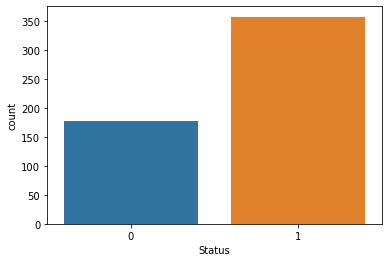

In [6]:
sns.countplot(x = 'Status', data = df)

<AxesSubplot:xlabel='Status', ylabel='count'>

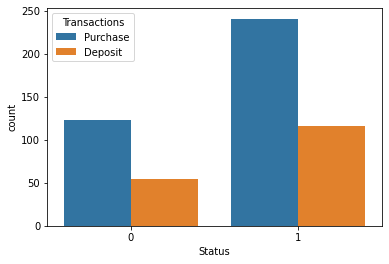

In [7]:
sns.countplot(x = 'Status', hue = 'Transactions', data = df)

<AxesSubplot:ylabel='Frequency'>

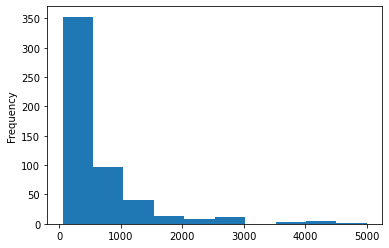

In [8]:
df['Amount'].plot.hist()

<AxesSubplot:xlabel='Transactions', ylabel='Amount'>

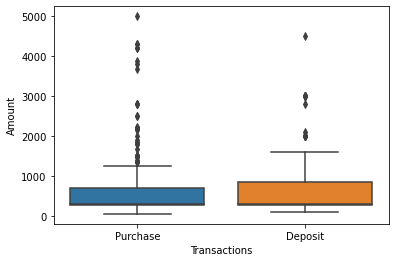

In [9]:
sns.boxplot(x = 'Transactions', y = 'Amount', data = df)

<AxesSubplot:xlabel='Week', ylabel='Amount'>

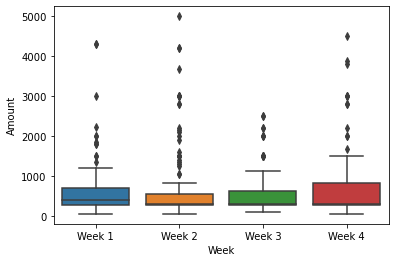

In [10]:
sns.boxplot(x = 'Week', y = 'Amount', data = df)

<AxesSubplot:xlabel='Status', ylabel='count'>

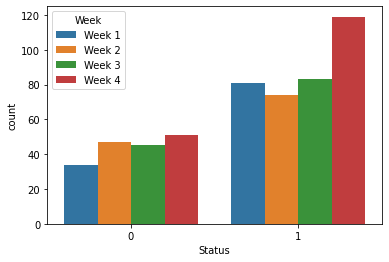

In [11]:
sns.countplot(x = 'Status', hue = 'Week', data = df)

# Data wrangling to remove unneeded data

In [12]:
df.drop('Cust_id', axis = 1, inplace = True)

In [13]:
df.head()

,Transactions,Amount,Status,Week
0,Purchase,300,1,Week 1
1,Purchase,300,1,Week 1
2,Purchase,200,0,Week 1
3,Purchase,500,0,Week 1
4,Purchase,1860,0,Week 1


In [14]:
group = df.groupby('Week')

In [15]:
purch = pd.get_dummies(df['Transactions'], drop_first = True)
purch.head()

,Purchase
0,1
1,1
2,1
3,1
4,1


In [16]:
week = pd.get_dummies(df['Week'])
week.head()

,Week 1,Week 2,Week 3,Week 4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


## Add number based values to replace string columns

In [17]:
df = pd.concat([df, purch, week], axis = 1)
df.head()

,Transactions,Amount,Status,Week,Purchase,Week 1,Week 2,Week 3,Week 4
0,Purchase,300,1,Week 1,1,1,0,0,0
1,Purchase,300,1,Week 1,1,1,0,0,0
2,Purchase,200,0,Week 1,1,1,0,0,0
3,Purchase,500,0,Week 1,1,1,0,0,0
4,Purchase,1860,0,Week 1,1,1,0,0,0


In [18]:
df.drop(['Transactions', 'Week', 'Amount'], axis = 1, inplace = True)
df.head()

,Status,Purchase,Week 1,Week 2,Week 3,Week 4
0,1,1,1,0,0,0
1,1,1,1,0,0,0
2,0,1,1,0,0,0
3,0,1,1,0,0,0
4,0,1,1,0,0,0


In [19]:
corr_df = df.corr()
corr_df.head()


,Status,Purchase,Week 1,Week 2,Week 3,Week 4
Status,1.000000,-0.020054,0.039852,-0.065505,-0.023977,0.045673
Purchase,-0.020054,1.000000,-0.013589,-0.148646,0.035304,0.113219
Week 1,0.039852,-0.013589,1.000000,-0.283570,-0.294160,-0.358027
Week 2,-0.065505,-0.148646,-0.283570,1.000000,-0.303920,-0.369906
Week 3,-0.023977,0.035304,-0.294160,-0.303920,1.000000,-0.383721


## Train and test data

In [20]:
## Picking my dependent (Y) and independent variables (X)
X = df.drop('Status', axis = 1)
y = df['Status']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()

In [25]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)
print(X_test, predictions)

     Purchase  Week 1  Week 2  Week 3  Week 4
222         1       0       0       0       1
131         1       0       0       1       0
149         1       0       0       0       1
244         1       1       0       0       0
84          1       0       0       0       1
..        ...     ...     ...     ...     ...
253         1       1       0       0       0
307         1       0       1       0       0
59          0       0       1       0       0
111         0       0       1       0       0
415         0       0       0       1       0

[267 rows x 5 columns] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [27]:
from sklearn.metrics import classification_report

In [28]:
classification_report(y_test, predictions)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       100\n           1       0.63      1.00      0.77       167\n\n    accuracy                           0.63       267\n   macro avg       0.31      0.50      0.38       267\nweighted avg       0.39      0.63      0.48       267\n'

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, predictions)

array([[  0, 100],
       [  0, 167]], dtype=int64)